<a href="https://colab.research.google.com/github/GuilhermeCarv/Projeto-AirBnB-Tokyo/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 12 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [74]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline 

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-07-20/visualisations/listings.csv",sep=',')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [76]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,16000,3,165,2019-11-14,1.54,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7676,3,228,2020-01-18,2.39,1,144
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.80,2,270
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,11312,1,252,2020-02-12,2.80,3,365
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,1.01,2,88


Como a base de dados possui os preços atrelados a moeda local é interessante que se crie uma coluna extra no dataset com o preço em real  

In [77]:
# criando coluna com os valores transportados em real
def conversao (preço):
  preço['price'] *= 0.048
  return float (preço['price'])


In [78]:
#adicionando os novos valores ao DataFrame
df['preço'] = df.apply(conversao, axis=1) 

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [79]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Varíaveis: \t {}".format(df.shape[1]))

# verificar o tipo das variáveis
display(df.dtypes)

Entradas: 	 10760
Varíaveis: 	 17


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
preço                             float64
dtype: object

In [80]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,preço
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,16000,3,165,2019-11-14,1.54,1,363,768.000
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7676,3,228,2020-01-18,2.39,1,144,368.448
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.80,2,270,1440.000
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,11312,1,252,2020-02-12,2.80,3,365,542.976
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,1.01,2,88,144.000


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [81]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.187918
last_review                       0.187918
host_name                         0.001487
preço                             0.000000
latitude                          0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

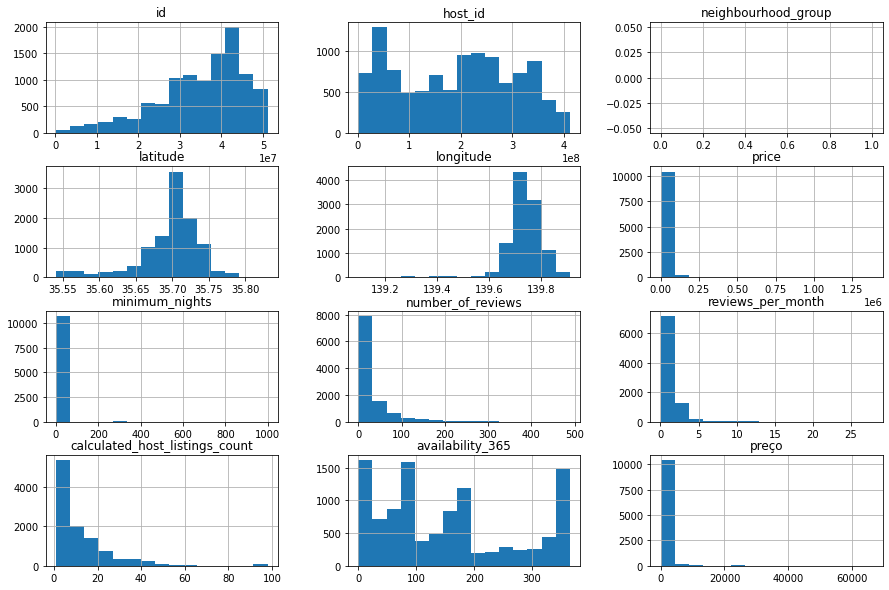

In [82]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Análise de *Outliers*** ###

*Outliers* podem ser traduzidos como "pontos fora da curva", ou seja, valores discrepantes dentro do conjunto de dados.

A análise visual dos histogramas plotados levanta suspeitas de que existem *outliers* nas variavéis `price` e `calculated_host_listings_count`

Para verificar essa análise inicial duas ferramentas serão utilizadas:

* Utilizar o método `describe()` para fornecer um resumo estatístico
* Plotar *boxplots* para as variavéis

Ressalta-se que um *outlier* não necessariamente é um erro, podendo ser apenas um comportamento atípico real.

In [83]:
# ver resumo estatístico das variáveis numéricas
df[['preço', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()


,preço,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10760.000000,10760.000000,10760.000000,8738.000000,10760.000000,10760.000000
mean,1032.645578,3.531041,27.081877,1.162398,12.584758,153.398699
std,2901.579621,20.578030,43.501770,1.243153,14.443079,118.661460
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,252.336000,1.000000,1.000000,0.380000,3.000000,61.000000
50%,442.992000,1.000000,9.000000,0.880000,8.000000,134.000000
75%,864.000000,2.000000,34.000000,1.560000,16.000000,245.250000
max,66240.000000,999.000000,489.000000,27.740000,98.000000,365.000000


O resumo estatístico acima traz algumas informações interessantes:

* Apesar de 75% dos valores de `price`serem de até R$ 918,00, o valor máximo é quase 77x maior (51000,00 reais)
*	O `calculated_host_listings_count`máximo é de 98, indicando que talvez esse anfitrião seja na verdade uma rede hoteleira disponibilizando quartos
* Existem imóveis que não estão disponíveis em nenhum dia do ano, uma vez que o valor de sua `availability_365` é 0

#### Boxplot para calculated_host_listings_count

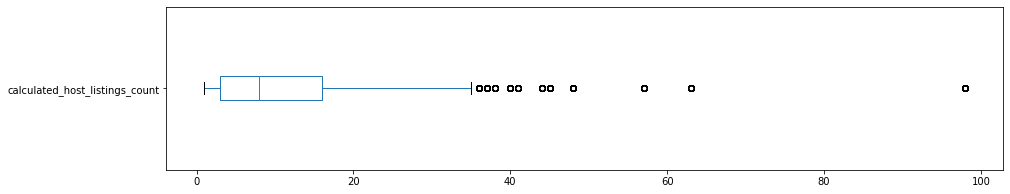

In [84]:
df.calculated_host_listings_count.plot(kind = 'box', vert=False, figsize=(15,3))
plt.show()

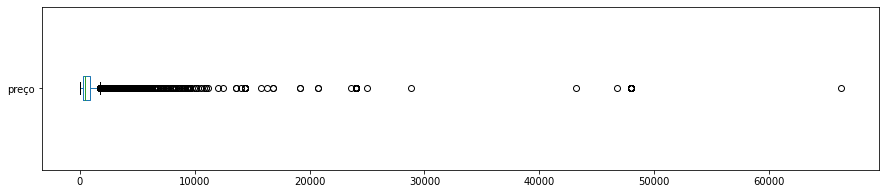

In [85]:
df.preço.plot(kind = 'box', vert=False, figsize=(15,3))
plt.show()

Para definir um ponto de corte de *outliers* o Intervalo Interquartil (IIQ) pode ser utilizado. A seguir é calculado o IIQ e quais valores seriam *outliers* baixos e altos dentro da variável `preço`

In [86]:
#cálculo de quartis e do IIQ para preço

Q1_preço= df['preço'].quantile(0.25)
Q3_preço =  df['preço'].quantile(0.75)
IIQ_preço = Q3_preço - Q1_preço
Outlier_baixo = Q1_preço - (1.5*IIQ_preço)
Outlier_alto = Q3_preço + (1.5*IIQ_preço)
print("Tudo abaixo de: " + str(Outlier_baixo) + " é um Outlier baixo")
print("Tudo acima de: " + str(Outlier_alto) + " é um Outlier alto")
print("Valores acima de 1892: {}".format((len(df[df.preço > 1892]))))
print("Porcentual de valores acima do Outlier alto: {:.4f}%".format((len(df[df.preço > 1892]) / df.shape[0])*100))

Tudo abaixo de: -665.16 é um Outlier baixo
Tudo acima de: 1781.496 é um Outlier alto
Valores acima de 1892: 951
Porcentual de valores acima do Outlier alto: 8.8383%


A quantidade de imóveis que não possuem disponibilidade ao longo do ano é dada a seguir.

In [87]:
#imóveis com availability_365 igual a 0
print("Número de imóveis que não possuem disponibilidade ao longo do ano: {}".format(len(df[df.availability_365 == 0])))
print("Porcentual de imóveis que não possuem disponibilidade ao longo do ano {:.4f}%".format((len(df[df.availability_365 == 0]) / df.shape[0])*100))

Número de imóveis que não possuem disponibilidade ao longo do ano: 1087
Porcentual de imóveis que não possuem disponibilidade ao longo do ano 10.1022%


#### Histogramas sem *outliers*

As váriaveis `price`e `availability_365` possuem *outliers*, logo é necessário limpar o *DataFrame* para uma análise mais realista

In [88]:
# remover outliers em um novo df
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.preço > 1892].index, axis=0, inplace = True)
df_clean.drop(df_clean[df_clean.availability_365 == 0].index, axis=0, inplace= True)

#remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group',axis=1,inplace=True)

print("Entradas do DataFrame limpo: {}".format(df_clean.shape[0]))


Entradas do DataFrame limpo: 8910


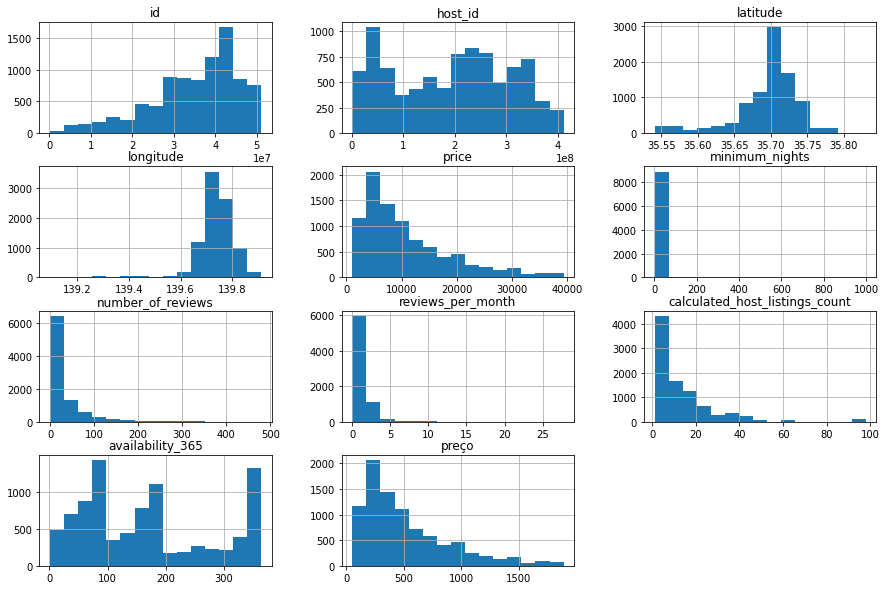

In [89]:
#plotar novo histograma
df_clean.hist(bins=15, figsize = (15,10));

### **Q4. Qual a correlação existente entre as variáveis**

A correlação indica se há relação, e seu tipo, entre duas variáveis.

Essa relação pode ser medida e a intensidade entre e, por meio do coeficiente de correlação, sua intensidade pode ser estabelecida. Para identificar as correlações existentes entre as variavéis numéricas, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, de forma a tornar a visualização mais amigável

In [90]:
# criar uma matriz de correlação
corr = df_clean[['price','preço','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,preço,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,1.000000,-0.055078,0.057173,0.081570,-0.053597,0.015572
preço,1.000000,1.000000,-0.055078,0.057173,0.081570,-0.053597,0.015572
minimum_nights,-0.055078,-0.055078,1.000000,-0.039800,-0.042841,0.063181,0.083035
number_of_reviews,0.057173,0.057173,-0.039800,1.000000,0.637268,-0.150472,0.005950
reviews_per_month,0.081570,0.081570,-0.042841,0.637268,1.000000,-0.126140,-0.023727
calculated_host_listings_count,-0.053597,-0.053597,0.063181,-0.150472,-0.126140,1.000000,0.180189
availability_365,0.015572,0.015572,0.083035,0.005950,-0.023727,0.180189,1.000000


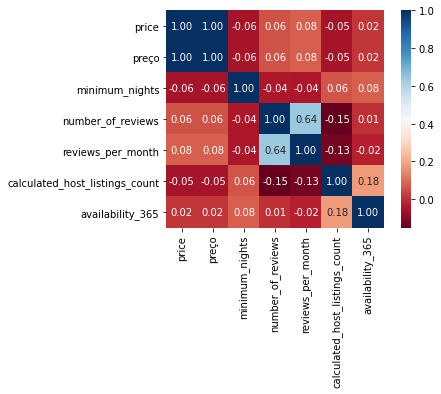

In [91]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor= 'white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Um dos diferenciais da plataforma é oferecer diversos tipos de modalidade de locação, facilitando tanto para o anfitrião que não necessariamente precisa sair de seu imóvel durante a locação, quanto para o hóspede, que pode procurar hospedagem que se adeque mais ao seu estilo. 

A variável `room_type` indica o tipo de locação disponível no AirBnB e sua ocorrência pode ser contada utilizando-se o método `value_counts` 

In [92]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6122
Private room       2144
Hotel room          343
Shared room         301
Name: room_type, dtype: int64

In [93]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] *100

Entire home/apt    68.709315
Private room       24.062851
Hotel room          3.849607
Shared room         3.378227
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Tokyo?**
A função `group_by()` verifica uma variável em função de outra . No caso queremos comparar os bairros (*neighbourhoods*) e seu preço de locação (`preço`)


In [94]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).preço.mean().sort_values(ascending=False)[:10]

neighbourhood
Hamura Shi        1060.176000
Nishitokyo Shi     874.873600
Chofu Shi          836.928000
Musashino Shi      696.836571
Minato Ku          650.357303
Shibuya Ku         598.174455
Chiyoda Ku         594.332773
Mitaka Shi         586.961455
Fuchu Shi          579.104000
Taito Ku           577.971193
Name: preço, dtype: float64

Uma rápida pesquisa no Google Maps mostra que a localidade de Hamura Shi é afastada do centro do Tokyo, cerca de 1h de carro e perto de 2h utilizando transporte público. 

Uma investigação mais aprofundada mostra que na realidade Hamura Shi possui apenas quatro imóveis listados com uma discrepância grande entre o menor e o maior preço

In [95]:
print(df_clean[df_clean['neighbourhood'] == 'Hamura Shi'].shape[0])
df_clean[df_clean['neighbourhood']== 'Hamura Shi']

4


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,preço
1544,22947785,羽村駅徒歩14分テラス付き素敵なメゾネット！A1,169807146,陽子,Hamura Shi,35.76276,139.32190,Entire home/apt,28120,4,4,2019-05-04,0.21,8,263,1349.760
1562,22987845,JR羽村駅徒歩14分 凝った内装でゆったり2DK/B3,169807146,陽子,Hamura Shi,35.76472,139.32737,Entire home/apt,28571,5,1,2018-04-10,0.03,8,263,1371.408
1565,22988271,羽村駅徒歩14分の2DK！自然派にもオススメB5,169807146,陽子,Hamura Shi,35.76268,139.32683,Entire home/apt,28571,4,6,2020-02-19,0.26,8,353,1371.408
5326,37401769,Nprkg #201 Hamura0.6/Yokota1.5mi 2ppl Tokyo su...,38919757,Max Masaking,Hamura Shi,35.75033,139.31400,Entire home/apt,3086,1,16,2021-02-08,1.16,8,107,148.128


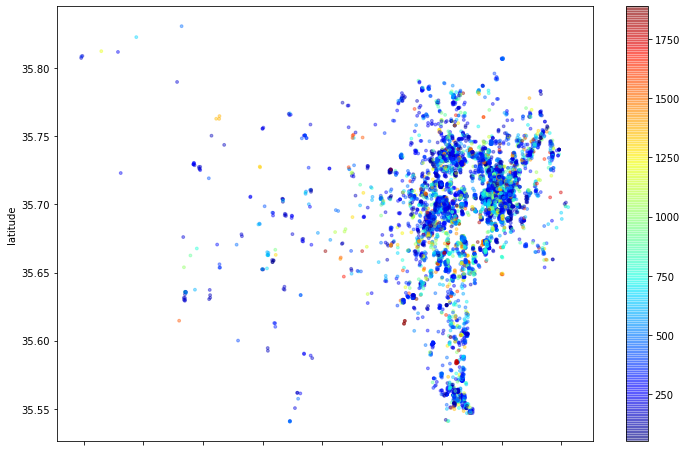

In [96]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,c=df_clean['preço'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [100]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()
df_clean.groupby('neighbourhood').minimum_nights.mean().sort_values(ascending=False)


neighbourhood
Toshima Ku             15.922977
Tama Shi               11.875000
Hino Shi                4.238095
Suginami Ku             4.120000
Kokubunji Shi           4.090909
Koto Ku                 3.849057
Koganei Shi             3.500000
Akishima Shi            3.500000
Hamura Shi              3.500000
Minato Ku               3.300283
Shinjuku Ku             3.154243
Meguro Ku               3.078947
Sumida Ku               2.983888
Itabashi Ku             2.750000
Musashino Shi           2.714286
Shibuya Ku              2.568670
Nakano Ku               2.517391
Mitaka Shi              2.454545
Komae Shi               2.333333
Kita Ku                 2.273585
Katsushika Ku           2.269912
Shinagawa Ku            2.180791
Edogawa Ku              2.171642
Higashimurayama Shi     2.153846
Setagaya Ku             2.145038
Adachi Ku               2.082353
Higashikurume Shi       2.000000
Kodaira Shi             2.000000
Fussa Shi               2.000000
Nerima Ku               1.958

### Q8. Média de preços dos melhores locais para se hospedar



In [101]:
#ver a média de preço dos locais centrais (Shinjuku Ku, Shibuya Ku,Minato Ku,Chuo Ku,Chiyoda Ku)
df_centro = df_clean.copy()
df_centro.drop(df_centro[(df_centro['neighbourhood'] != 'Shinjuku Ku') &  (df_centro['neighbourhood'] != 'Shibuya Ku') & (df_centro['neighbourhood'] != 'Minato Ku') & (df_centro['neighbourhood'] != 'Chuo Ku') & (df_centro['neighbourhood'] != 'Chiyoda Ku')].index,axis=0,inplace=True)
df_centro.groupby('neighbourhood').preço.mean().sort_values(ascending=False)

neighbourhood
Minato Ku      650.357303
Shibuya Ku     598.174455
Chiyoda Ku     594.332773
Shinjuku Ku    500.425541
Chuo Ku        493.811286
Name: preço, dtype: float64

In [102]:
##ver a média dias dos locais centrais (Shinjuku Ku, Shibuya Ku,Minato Ku,Chuo Ku,Chiyoda Ku)
df_centro.groupby('neighbourhood').minimum_nights.mean().sort_values(ascending=False)



neighbourhood
Minato Ku      3.300283
Shinjuku Ku    3.154243
Shibuya Ku     2.568670
Chiyoda Ku     1.336134
Chuo Ku        1.255952
Name: minimum_nights, dtype: float64

In [103]:
#quantidade de imóveis de cada bairro
df_centro['neighbourhood'].value_counts()

Shinjuku Ku    1744
Shibuya Ku      466
Minato Ku       353
Chuo Ku         336
Chiyoda Ku      119
Name: neighbourhood, dtype: int64

## Conclusões


Apesar de ser uma análise geral do panorama dos dados importados, esse levantamento gera alguns insights interessantes como:
 * É interessante empenhar uma verba diária perto dos R\$500,00 para hospedagem caso Tóquio seja um destino desejado para suas férias, uma vez que 50% dos imóveis se localizam abaixo dessa faixa. Isso é ainda mais expressivo para os casos dos bairros centrais, onde a média dos preços gira entre R\$500,00 e R\$650,00.

 *Tóquio não é uma boa cidade para pernoites, visto que o número mínimo de noites exigidas para locação, em média, é superior à 1 em vários bairros. Caso esse seja seu caso, a opção do AirBnB talvez não seja a mais interessante.

 *Por ter a maior parte de seus imóveis disponíveis sendo do tipo Entire home/apt (Imóvel inteiro) ou do tipo Private room (Quarto privado), a cidade se torna atraente tanto para famílias que necessitam de mais privacidade em sua locação quanto para viajantes sozinhos.